In [ ]:
!pip install transformers datasets accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.8 MB/s eta 0:00:00


In [ ]:
kaggle_creds_path = "/content/kaggle.json"

! pip install kaggle

! mkdir ~/.kaggle
! cp /content/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat '/content/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!pip3 install datasets

In [ ]:
import datasets
print(datasets.__version__)

3.0.2


In [ ]:
!kaggle datasets download -d skywalker290/hindi-f

Dataset URL: https://www.kaggle.com/datasets/skywalker290/hindi-f
License(s): CC0-1.0
100% 15.9G/15.9G [02:51<00:00, 162MB/s]
100% 15.9G/15.9G [02:51<00:00, 99.4MB/s]


In [ ]:
!mkdir file

In [ ]:
import zipfile
import os

# Define the paths
zip_file_path = '/content/hindi-f.zip'
extract_folder_path = '/content/file'

# Create the folder if it doesn't exist
os.makedirs(extract_folder_path, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder_path)

print("Extraction completed.")

Extraction completed.


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Define the paths to the folders
wav_folder = '/content/file/Hindi_F/wav'
txt_folder = '/content/file/Hindi_F/txt'

# Initialize lists to store the data
file_paths = []
transcripts = []

# Loop through all files in the wav folder
for file_name in os.listdir(wav_folder):
    if file_name.endswith('.wav'):
        # Construct the corresponding txt file name
        txt_file_name = file_name.replace('.wav', '.txt')

        # Construct full file paths
        wav_file_path = os.path.join(wav_folder, file_name)
        txt_file_path = os.path.join(txt_folder, txt_file_name)

        # Check if the corresponding txt file exists
        if os.path.exists(txt_file_path):
            # Read the transcript from the txt file
            with open(txt_file_path, 'r') as f:
                transcript = f.read().strip()

            # Append the file path and transcript to the lists
            file_paths.append(wav_file_path)
            transcripts.append(transcript)

# Create a DataFrame from the lists
df = pd.DataFrame({'file_path': file_paths, 'transcript': transcripts})

# Display the DataFrame
print(df)

                                               file_path  \
0       /content/file/Hindi_F/wav/hi_f_weather_02535.wav   
1         /content/file/Hindi_F/wav/hi_f_books_04883.wav   
2         /content/file/Hindi_F/wav/hi_f_books_08743.wav   
3         /content/file/Hindi_F/wav/hi_f_books_05303.wav   
4      /content/file/Hindi_F/wav/hi_f_politics_03261.wav   
...                                                  ...   
16507     /content/file/Hindi_F/wav/hi_f_other_01357.wav   
16508    /content/file/Hindi_F/wav/hi_f_health_00498.wav   
16509     /content/file/Hindi_F/wav/hi_f_other_00936.wav   
16510  /content/file/Hindi_F/wav/hi_f_education_02030...   
16511    /content/file/Hindi_F/wav/hi_f_health_02733.wav   

                                              transcript  
0      एक ओर राजवंशों के इतिहास को महत्त्व देनेवाला इ...  
1      इस विषय में हम इस पाठ में जानकारी लेने वाले है...  
2      मीराबाई संभवतः भक्ति परंपरा की सबसे सुप्रसिद्ध...  
3      धुलाई तथा अन्य घरेलू कार्य में उपयोग

In [ ]:
import os
from datasets import Dataset, Audio

# Define the paths to the folders
wav_folder = '/content/file/Hindi_F/wav'
txt_folder = '/content/file/Hindi_F/txt'

# Initialize lists to store the data
file_paths = []
transcripts = []

# Loop through all files in the wav folder
for file_name in os.listdir(wav_folder):
    if file_name.endswith('.wav'):
        # Construct the corresponding txt file name
        txt_file_name = file_name.replace('.wav', '.txt')

        # Construct full file paths
        wav_file_path = os.path.join(wav_folder, file_name)
        txt_file_path = os.path.join(txt_folder, txt_file_name)

        # Check if the corresponding txt file exists
        if os.path.exists(txt_file_path):
            # Read the transcript from the txt file
            with open(txt_file_path, 'r') as f:
                transcript = f.read().strip()

            # Append the file path and transcript to the lists
            file_paths.append(wav_file_path)
            transcripts.append(transcript)

# Create a dataset from the lists
data_dict = {'file_path': file_paths, 'transcript': transcripts}
dataset = Dataset.from_dict(data_dict)

# Optionally, load audio files using the Audio feature
dataset = dataset.cast_column("file_path", Audio(sampling_rate=16000))

# Display the dataset
print(dataset)

Dataset({
    features: ['file_path', 'transcript'],
    num_rows: 16512
})


In [ ]:
dataset[0]

{'file_path': {'path': '/content/file/Hindi_F/wav/hi_f_weather_02535.wav',
  'array': array([ 3.46577726e-05,  4.59030271e-05,  1.79018825e-05, ...,
         -7.54185294e-06, -7.23181074e-06, -8.01026817e-06]),
  'sampling_rate': 16000},
 'transcript': 'एक ओर राजवंशों के इतिहास को महत्त्व देनेवाला इतिहास लेखन किया जा रहा था;।'}

In [ ]:
len(dataset)

16512

# Clean Up

In [ ]:
from transformers import SpeechT5Processor, SpeechT5ForTextToSpeech

processor = SpeechT5Processor.from_pretrained("microsoft/speecht5_tts")
model = SpeechT5ForTextToSpeech.from_pretrained("microsoft/speecht5_tts")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/433 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/232 [00:00<?, ?B/s]

spm_char.model:   0%|          | 0.00/238k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/234 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/2.06k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/585M [00:00<?, ?B/s]

In [ ]:
tokenizer = processor.tokenizer

In [ ]:
def extract_all_chars(batch):
    all_text = " ".join(batch["transcript"])
    vocab = list(set(all_text))
    return {"vocab": [vocab], "all_text": [all_text]}

vocabs = dataset.map(
    extract_all_chars,
    batched=True,
    batch_size=-1,
    keep_in_memory=True,
    remove_columns=dataset.column_names,
)

dataset_vocab = set(vocabs["vocab"][0])
tokenizer_vocab = {k for k,_ in tokenizer.get_vocab().items()}

Map:   0%|          | 0/16512 [00:00<?, ? examples/s]

In [ ]:
dataset_vocab - tokenizer_vocab

{' ',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '|',
 '°',
 'º',
 'ँ',
 'ं',
 'ः',
 'अ',
 'आ',
 'इ',
 'ई',
 'उ',
 'ऊ',
 'ऋ',
 'ऎ',
 'ए',
 'ऐ',
 'ऑ',
 'ओ',
 'औ',
 'क',
 'ख',
 'ग',
 'घ',
 'ङ',
 'च',
 'छ',
 'ज',
 'झ',
 'ञ',
 'ट',
 'ठ',
 'ड',
 'ढ',
 'ण',
 'त',
 'थ',
 'द',
 'ध',
 'न',
 'ऩ',
 'प',
 'फ',
 'ब',
 'भ',
 'म',
 'य',
 'र',
 'ऱ',
 'ल',
 'ळ',
 'व',
 'श',
 'ष',
 'स',
 'ह',
 '़',
 'ा',
 'ि',
 'ी',
 'ु',
 'ू',
 'ृ',
 'ॄ',
 'ॅ',
 'ॆ',
 'े',
 'ै',
 'ॉ',
 'ॊ',
 'ो',
 'ौ',
 '्',
 'ॐ',
 'ॖ',
 'क़',
 'ख़',
 'ग़',
 'ज़',
 'ड़',
 'ढ़',
 'फ़',
 'य़',
 'ॠ',
 '।',
 '॥',
 '०',
 '१',
 '२',
 '३',
 '४',
 '५',
 '६',
 '७',
 '८',
 '९',
 '॰',
 'ॲ',
 '\u2009',
 '\u200b',
 '\u200c',
 '\u200d',
 '–',
 '‘',
 '’',
 '“',
 '”'}

In [ ]:
def cleanup_text(inputs):
    # Since no replacements are specified, we simply return the inputs as they are
    return inputs

# Assuming your dataset is already defined, apply the cleanup_text function
dataset = dataset.map(cleanup_text)

Map:   0%|          | 0/16512 [00:00<?, ? examples/s]

In [ ]:
missing_vocab = dataset_vocab - tokenizer_vocab

In [ ]:
tokenizer.add_tokens(list(missing_vocab))

117

# Preparing dataset

In [ ]:
# Iterate over each entry in the dataset
for entry in dataset:
    # Insert the speaker_id
    entry['speaker_id'] = 1

# Optional: Check the first entry to confirm
print(dataset[0])


{'file_path': {'path': '/content/file/Hindi_F/wav/hi_f_weather_02535.wav', 'array': array([ 3.46577726e-05,  4.59030271e-05,  1.79018825e-05, ...,
       -7.54185294e-06, -7.23181074e-06, -8.01026817e-06]), 'sampling_rate': 16000}, 'transcript': 'एक ओर राजवंशों के इतिहास को महत्त्व देनेवाला इतिहास लेखन किया जा रहा था;।'}


In [ ]:
!pip install speechbrain

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 807.2/807.2 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.2/722.2 kB 34.9 MB/s eta 0:00:00


In [ ]:
import os
import torch
from speechbrain.pretrained import EncoderClassifier

spk_model_name = "speechbrain/spkrec-xvect-voxceleb"

device = "cuda" if torch.cuda.is_available() else "cpu"
speaker_model = EncoderClassifier.from_hparams(
    source=spk_model_name,
    run_opts={"device": device},
    savedir=os.path.join("/tmp", spk_model_name)
)

def create_speaker_embedding(waveform):
    with torch.no_grad():
        speaker_embeddings = speaker_model.encode_batch(torch.tensor(waveform))
        speaker_embeddings = torch.nn.functional.normalize(speaker_embeddings, dim=2)
        speaker_embeddings = speaker_embeddings.squeeze().cpu().numpy()
    return speaker_embeddings

<ipython-input-22-9f95de381175>:3: UserWarning: Module 'speechbrain.pretrained' was deprecated, redirecting to 'speechbrain.inference'. Please update your script. This is a change from SpeechBrain 1.0. See: https://github.com/speechbrain/speechbrain/releases/tag/v1.0.0
  from speechbrain.pretrained import EncoderClassifier


hyperparams.yaml:   0%|          | 0.00/2.04k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/speechbrain/utils/autocast.py:68: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  wrapped_fwd = torch.cuda.amp.custom_fwd(fwd, cast_inputs=cast_inputs)


embedding_model.ckpt:   0%|          | 0.00/16.9M [00:00<?, ?B/s]

mean_var_norm_emb.ckpt:   0%|          | 0.00/3.20k [00:00<?, ?B/s]

classifier.ckpt:   0%|          | 0.00/15.9M [00:00<?, ?B/s]

label_encoder.txt:   0%|          | 0.00/129k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/speechbrain/utils/checkpoints.py:194: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(path, map_location=device

In [ ]:
def prepare_dataset(example):
    # load the audio data; if necessary, this resamples the audio to 16kHz
    audio = example["file_path"]

    # feature extraction and tokenization
    example = processor(
        text=example["transcript"],
        audio_target=audio["array"],
        sampling_rate=audio["sampling_rate"],
        return_attention_mask=False,
    )

    # strip off the batch dimension
    example["labels"] = example["labels"][0]

    # use SpeechBrain to obtain x-vector
    example["speaker_embeddings"] = create_speaker_embedding(audio["array"])

    return example

In [ ]:
processed_example = prepare_dataset(dataset[0])

In [ ]:
list(processed_example.keys())

['input_ids', 'labels', 'speaker_embeddings']

In [ ]:
tokenizer.decode(processed_example["input_ids"])

'ए क   ओ र   र ा ज व ं श ो ं   क े   इ त ि ह ा स   क ो   म ह त ् त ् व   द े न े व ा ल ा   इ त ि ह ा स   ल े ख न   क ि य ा   ज ा   र ह ा   थ ा ; । </s>'

In [ ]:
processed_example["speaker_embeddings"].shape

(512,)

In [ ]:
for tokens in missing_vocab:
  print(tokens)

6
८
स
ः
।
य
ग
0
5
५
े
ॅ
ा
॥
ब
’
ख
६
4
|
8
9
ि
अ
ॆ
“
ॄ
२
ष
ँ
ज
घ
आ
ॲ
ऊ
 
ई
ए
ु
‘
झ
ौ
ॉ
ऋ
ॐ
ळ
श
2
ह
औ
उ
ण
४
थ
म
व
ठ
”
ू
ऱ
ध
क़
त
फ़
º
 
य़
–
इ
ड़
्
ज़
1
र
छ
ऑ
ञ
ॠ
७
ॊ
ख़
़
द
प
०
ल
ड
फ
ै
ी
​
१
ढ
च
ट
ऩ
‍
न
3
क
भ
ङ
ं
ऐ
ढ़
ग़
ऎ
°
ृ
ो
ओ
‌
॰
३
7
ॖ
९


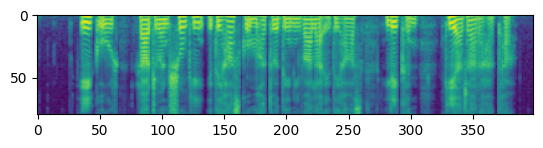

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(processed_example["labels"].T)
plt.show()

In [ ]:
from transformers import SpeechT5HifiGan
vocoder = SpeechT5HifiGan.from_pretrained("microsoft/speecht5_hifigan")

config.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/50.7M [00:00<?, ?B/s]

In [ ]:
spectrogram = torch.tensor(processed_example["labels"])
with torch.no_grad():
    speech = vocoder(spectrogram)

In [ ]:
from IPython.display import Audio
Audio(speech.cpu().numpy(), rate=16000)

In [ ]:
dataset = dataset.map(
    prepare_dataset, remove_columns=dataset.column_names,
)

Map:   0%|          | 0/16512 [00:00<?, ? examples/s]

In [ ]:
def is_not_too_long(input_ids):
    input_length = len(input_ids)
    return input_length < 250

dataset = dataset.filter(is_not_too_long, input_columns=["input_ids"])

Filter:   0%|          | 0/16512 [00:00<?, ? examples/s]

In [ ]:
len(dataset)

16476

In [ ]:
def is_not_too_long(input_ids):
    input_length = len(input_ids)
    return input_length < 200

dataset = dataset.filter(is_not_too_long, input_columns=["input_ids"])

Filter:   0%|          | 0/16476 [00:00<?, ? examples/s]

In [ ]:
len(dataset)

16336

# Train Test Split

In [ ]:
dataset = dataset.train_test_split(test_size=0.1)

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'labels', 'speaker_embeddings'],
        num_rows: 14702
    })
    test: Dataset({
        features: ['input_ids', 'labels', 'speaker_embeddings'],
        num_rows: 1634
    })
})

In [ ]:
from dataclasses import dataclass
from typing import Any, Dict, List, Union
import torch


@dataclass
class TTSDataCollatorWithPadding:
    processor: Any

    def __call__(
        self, features: List[Dict[str, Union[List[int], torch.Tensor]]]
    ) -> Dict[str, torch.Tensor]:
        input_ids = [{"input_ids": feature["input_ids"]} for feature in features]
        label_features = [{"input_values": feature["labels"]} for feature in features]
        speaker_features = [feature["speaker_embeddings"] for feature in features]

        # collate the inputs and targets into a batch
        batch = processor.pad(
            input_ids=input_ids, labels=label_features, return_tensors="pt"
        )

        # replace padding with -100 to ignore loss correctly
        batch["labels"] = batch["labels"].masked_fill(
            batch.decoder_attention_mask.unsqueeze(-1).ne(1), -100
        )

        # not used during fine-tuning
        del batch["decoder_attention_mask"]

        # round down target lengths to multiple of reduction factor
        if model.config.reduction_factor > 1:
            target_lengths = torch.tensor(
                [len(feature["input_values"]) for feature in label_features]
            )
            target_lengths = target_lengths.new(
                [
                    length - length % model.config.reduction_factor
                    for length in target_lengths
                ]
            )
            max_length = max(target_lengths)
            batch["labels"] = batch["labels"][:, :max_length]

        # also add in the speaker embeddings
        batch["speaker_embeddings"] = torch.tensor(speaker_features)

        return batch

In [ ]:
data_collator = TTSDataCollatorWithPadding(processor=processor)

In [ ]:
from transformers import SpeechT5ForTextToSpeech
import os


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = SpeechT5ForTextToSpeech.from_pretrained(
    "microsoft/speecht5_tts",
    ignore_mismatched_sizes=True
)

model.resize_token_embeddings(len(processor.tokenizer))

Embedding(198, 768, padding_idx=1)

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
from transformers import Seq2SeqTrainingArguments

batch_size = 8
num_train_epochs = 20
repo_name = "hindi_text_to_speech_tts"

training_args = Seq2SeqTrainingArguments(
    output_dir=repo_name,  # Change to a repo name of your choice
    per_device_train_batch_size=batch_size,
    gradient_accumulation_steps=1,
    learning_rate=1e-5,
    warmup_steps=500,
    num_train_epochs=num_train_epochs,
    gradient_checkpointing=True,
    fp16=True,
    eval_strategy="epoch",
    save_strategy="epoch",
    per_device_eval_batch_size=2,
    logging_steps=25,
    report_to=["tensorboard"],
    load_best_model_at_end=True,
    greater_is_better=False,
    label_names=["labels"],
    push_to_hub=True,
)

In [ ]:
from transformers import Seq2SeqTrainingArguments

batch_size = 8
num_train_epochs = 8
repo_name = "hindi_text_to_speech_tts"

training_args = Seq2SeqTrainingArguments(
    output_dir=repo_name,  # Change to a repo name of your choice
    per_device_train_batch_size=batch_size,
    gradient_accumulation_steps=1,
    learning_rate=1e-5,
    warmup_steps=500,
    num_train_epochs=num_train_epochs,
    gradient_checkpointing=True,
    fp16=True,
    eval_strategy="epoch",
    save_strategy="epoch",
    per_device_eval_batch_size=2,
    logging_steps=25,
    report_to=["tensorboard"],
    load_best_model_at_end=True,
    greater_is_better=False,
    label_names=["labels"],
    push_to_hub=True,
)

In [ ]:
from transformers import Seq2SeqTrainer
import os


trainer = Seq2SeqTrainer(
    args=training_args,
    model=model,
    train_dataset=dataset["train"],
    eval_dataset=dataset["test"],
    data_collator=data_collator,
    tokenizer=processor,
)

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


In [ ]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/torch/_dynamo/eval_frame.py:632: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...


Epoch,Training Loss,Validation Loss
1,0.527100,0.489954
2,0.515000,0.468990
3,0.506400,0.459370


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 1876}
/usr/local/lib/python3.10/dist-packages/torch/_dynamo/eval_frame.py:632: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-

KeyboardInterrupt: 

In [ ]:
trainer.push_to_hub(repo_name)

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 1876}


model.safetensors:   0%|          | 0.00/578M [00:00<?, ?B/s]

Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

events.out.tfevents.1729750815.84a03c1ce144.693.0:   0%|          | 0.00/53.8k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/ShigrafS/hindi_text_to_speech_tts/commit/0298e32af9525a5967e210d6907c83fa17fe1bde', commit_message='hindi_text_to_speech_tts', commit_description='', oid='0298e32af9525a5967e210d6907c83fa17fe1bde', pr_url=None, pr_revision=None, pr_num=None)

# Collator